In [1]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


## 1.0 Import Libraries & Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline


# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Library for Normalization of Numerical Data
from scipy.stats import zscore

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Define a random seed to reproduce any random process
rs = 123

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [6]:
url = 'https://raw.githubusercontent.com/nicwhitehead/-IBM-Machine-Learning-Supervised-Machine-Learning-Classification/main/german_credit_data.csv'
credit = pd.read_csv(url, header = 0, names = ['Index', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'])
credit.head()

,Index,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## 2.0 Exploratory Data Analysis

In [7]:
credit.describe()

,Index,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


##### Describe only works on features with numeric values

#####  Determine which are the most important features, then use get_dummies to convert to numeric values

In [8]:
#Looking for unique values
print(credit.nunique())
#Looking at the data
print(credit.head())

Index               1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64
   Index  Age     Sex  Job Housing Saving accounts Checking account  \
0      0   67    male    2     own             NaN           little   
1      1   22  female    2     own          little         moderate   
2      2   49    male    1     own          little              NaN   
3      3   45    male    2    free          little           little   
4      4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4    

In [9]:
#using seaborn library, we have used a frequency plot
sns.countplot('Risk', data=credit1)
plt.title('Risk Distribution', fontsize=14)
plt.show()

NameError: name 'credit1' is not defined

In [10]:
# Confirm null values in Saving Account & Checking Account variables
Saving_accounts= credit["Saving accounts"]
print("No. of null values in savings:")
print(Saving_accounts.isnull().values.sum())
Checking_accounts= credit["Checking account"]
print("No. of null values in Checking:")
print(Checking_accounts.isnull().values.sum())

No. of null values in savings:
183
No. of null values in Checking:
394


In [11]:
# label encode account quality and fill NaN with 0
def SC_LabelEncoder(text):
    if text == "little":
        return 1
    elif text == "moderate":
        return 2
    elif text == "quite rich":
        return 3
    elif text == "rich":
        return 4
    else:
        return 0

credit["Saving accounts"] = credit["Saving accounts"].apply(SC_LabelEncoder)
credit["Checking account"] = credit["Checking account"].apply(SC_LabelEncoder)

In [12]:
# label encode account quality and fill NaN with 0
def H_LabelEncoder(text):
    if text == "free":
        return 0
    elif text == "rent":
        return 1
    elif text == "own":
        return 2

credit["Housing"] = credit["Housing"].apply(H_LabelEncoder)

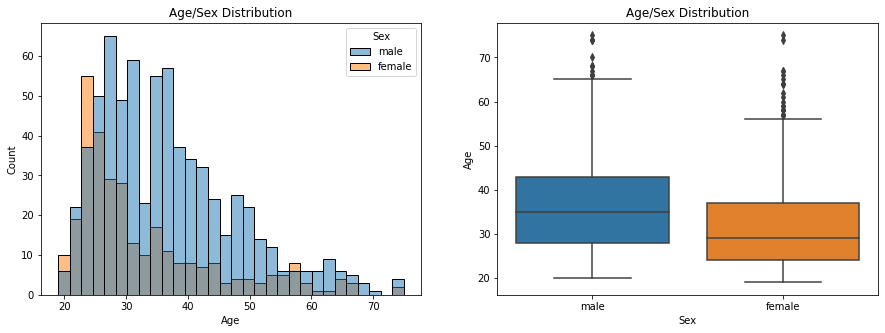

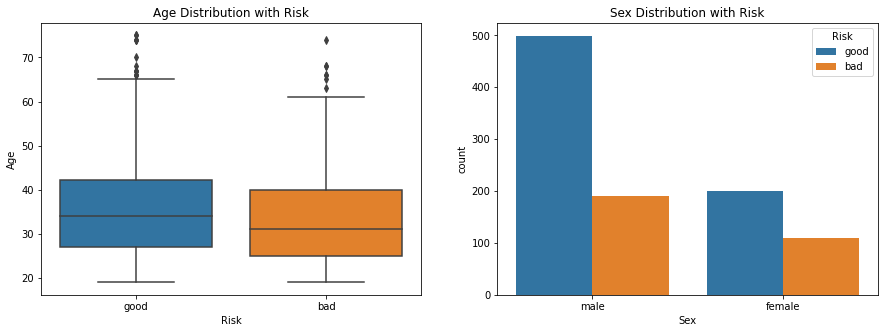

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(credit, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=credit, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=credit, x='Risk', y='Age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=credit, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex Distribution with Risk");

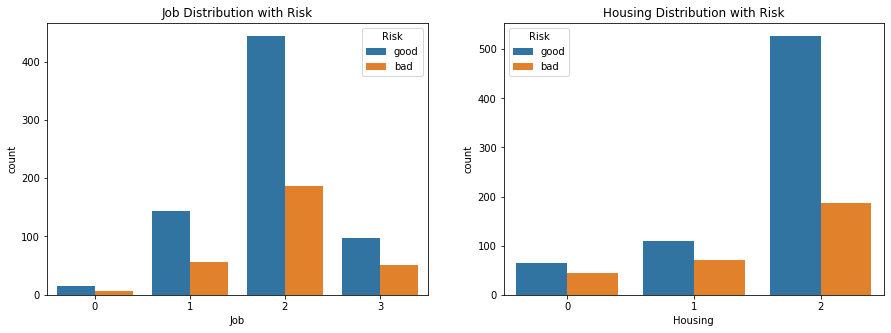

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=credit, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=credit, x="Housing", hue="Risk", ax=ax[1]).set_title("Housing Distribution with Risk");

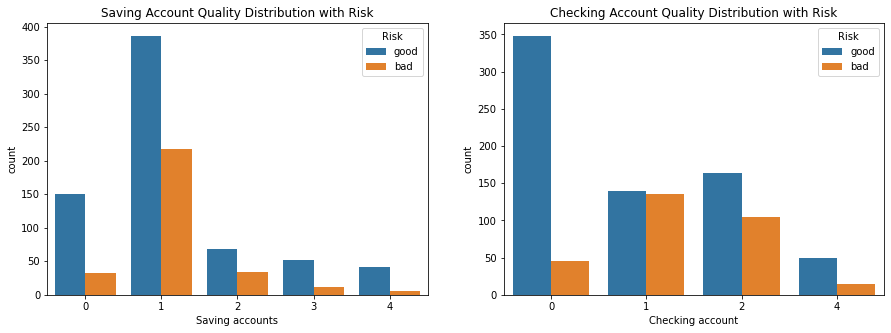

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=credit, x="Saving accounts", hue="Risk", ax=ax[0]).set_title("Saving Account Quality Distribution with Risk");
sns.countplot(data=credit, x="Checking account", hue="Risk", ax=ax[1]).set_title("Checking Account Quality Distribution with Risk");

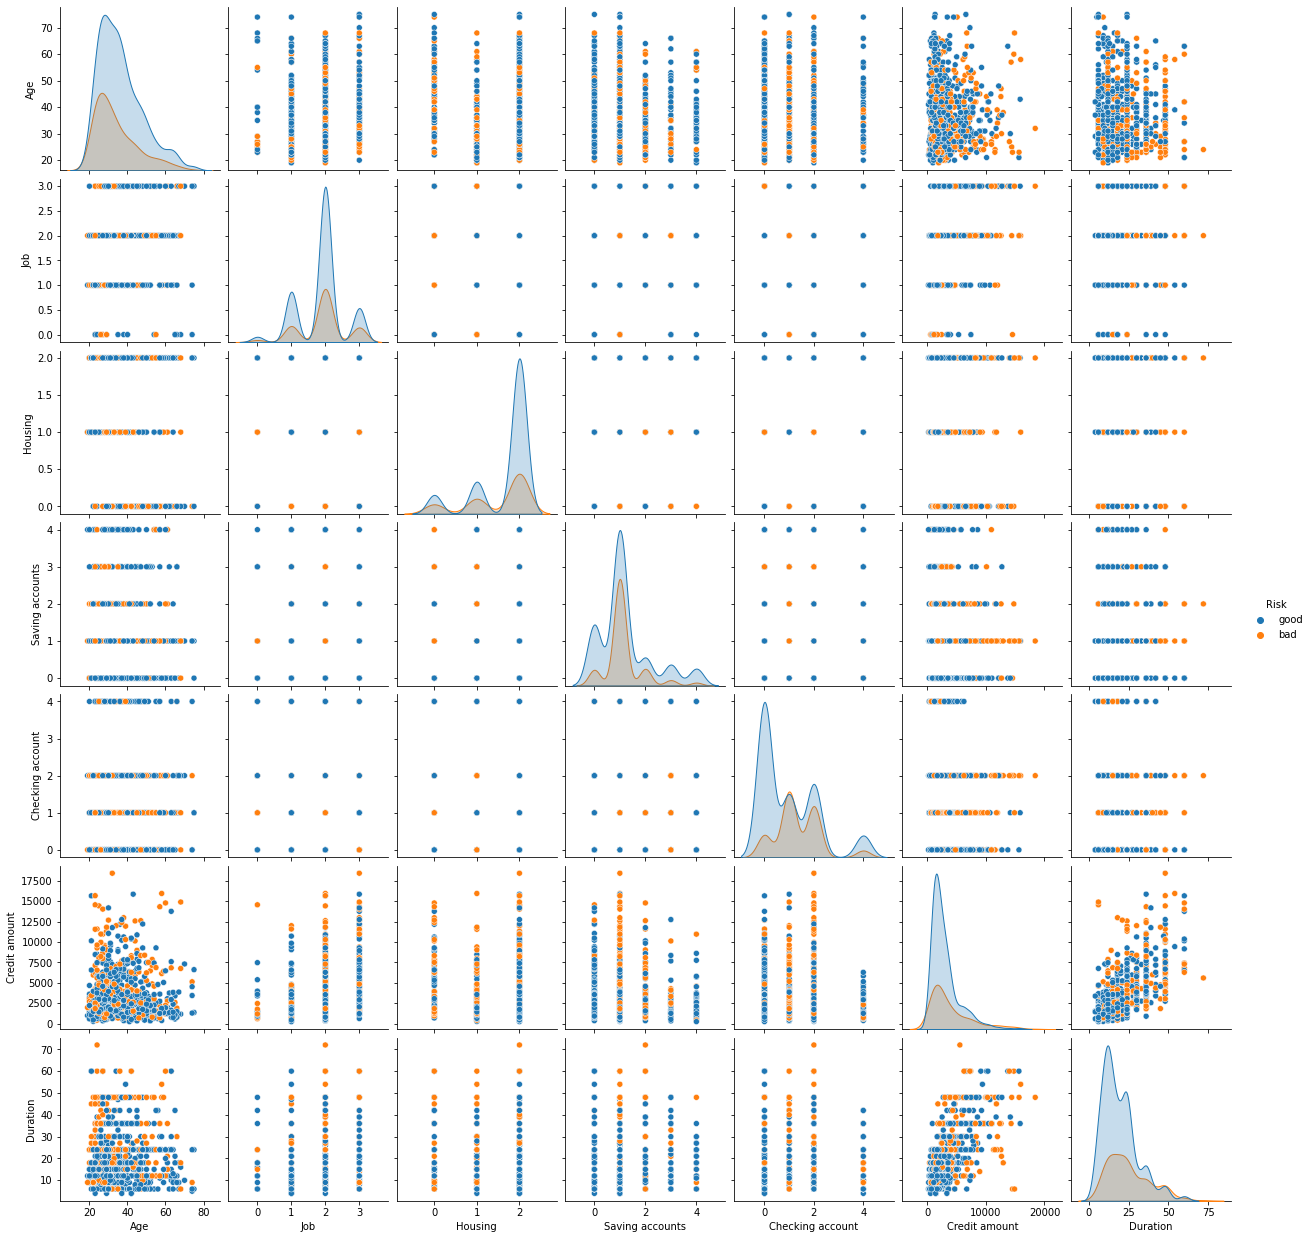

In [16]:
sns.pairplot(credit[['Age', 'Job', 'Housing', 'Saving accounts', 
                 'Checking account', 'Credit amount', 'Duration', "Risk"]], hue="Risk");

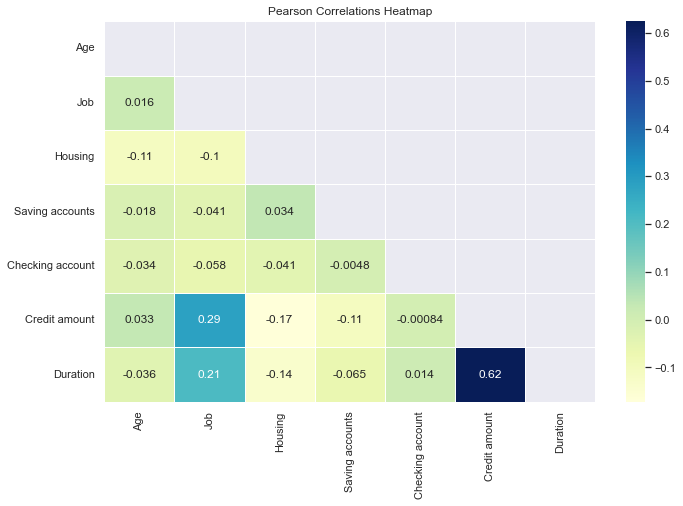

In [17]:
corr = credit[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

#### It appears that the following features are most likely to affect risk rating: 
##### Credit amount, Duration, Job, Savings Account, Check Account

### 3.0 Data Refinment

##### Drop columns not required for analysis

In [18]:
credit2=credit.drop(['Index','Age','Sex','Housing','Purpose'],axis=1)
credit2.head()

,Job,Saving accounts,Checking account,Credit amount,Duration,Risk
0,2,0,1,1169,6,good
1,2,1,2,5951,48,bad
2,1,1,0,2096,12,good
3,2,1,1,7882,42,good
4,2,1,1,4870,24,bad


##### Convert Risk to binary values

In [19]:
credit2['Risk'] = credit2['Risk'].replace({'good': '1', 'bad': '0'})

In [20]:
credit2.head()

,Job,Saving accounts,Checking account,Credit amount,Duration,Risk
0,2,0,1,1169,6,1
1,2,1,2,5951,48,0
2,1,1,0,2096,12,1
3,2,1,1,7882,42,1
4,2,1,1,4870,24,0


Then, let's split the dataset into input `X` and output `y`:

In [21]:
X = credit2.iloc[:, :-1]
y = credit2.iloc[:, -1:]
X.describe()

,Job,Saving accounts,Checking account,Credit amount,Duration
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1.904000,1.190000,1.06400,3271.258000,20.903000
std,0.653614,0.966869,1.10776,2822.736876,12.058814
min,0.000000,0.000000,0.00000,250.000000,4.000000
25%,2.000000,1.000000,0.00000,1365.500000,12.000000
50%,2.000000,1.000000,1.00000,2319.500000,18.000000
75%,2.000000,1.000000,2.00000,3972.250000,24.000000
max,3.000000,4.000000,4.00000,18424.000000,72.000000


Split the data into train and test, with 30% Test data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.0 K-Nearest Neighbor

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluate the performance of the classifier on the test data
accuracy = knn.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7066666666666667


In [25]:
from sklearn.model_selection import cross_val_score

# Test different values of n_neighbors
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    print("n_neighbors = {}: Accuracy = {:.2f} (+/- {:.2f})".format(k, scores.mean(), scores.std() * 2))

n_neighbors = 1: Accuracy = 0.69 (+/- 0.09)
n_neighbors = 3: Accuracy = 0.71 (+/- 0.08)
n_neighbors = 5: Accuracy = 0.71 (+/- 0.07)
n_neighbors = 7: Accuracy = 0.73 (+/- 0.07)
n_neighbors = 9: Accuracy = 0.72 (+/- 0.08)


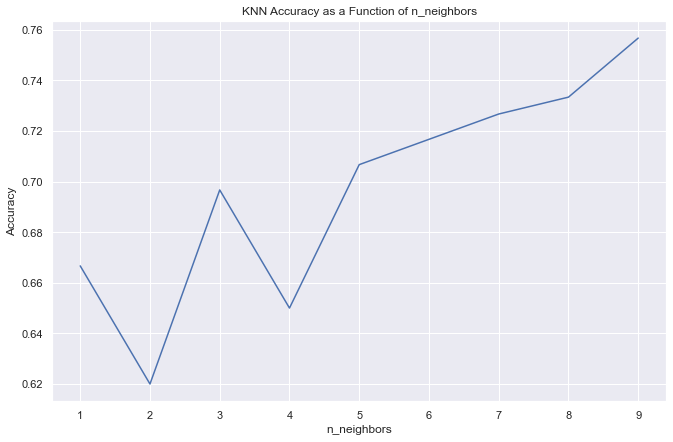

In [26]:
# Test different values of n_neighbors
k_values = range(1, 10)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    scores.append(score)

# Plot the accuracy as a function of n_neighbors
plt.plot(k_values, scores)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy as a Function of n_neighbors')
plt.show()

It appears that the best value of n is 9.  Tested by Cross Validation Score and Elbow method.

### 4.1 Logistic Regression

In [27]:
# First, let's split the training and testing dataset
X_log = credit2.iloc[:, :-1]
y_log = credit2.iloc[:, -1:]

In [28]:
scaler = MinMaxScaler()

In [29]:
X = scaler.fit_transform(X_log)

In [30]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


For `y`, use the `LabelEncoder` from `sklearn` to encode its 2 class values.

In [31]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_log.values.ravel())

In [32]:
np.unique(y, return_counts=True)

(array([0, 1]), array([300, 700], dtype=int64))

In [33]:
# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, stratify=y, random_state = rs)

In [34]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (800, 5), y_train: (800, 1)


In [35]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (200, 5), y_test: (200, 1)


Define a sklearn.linear_model.LogisticRegression model with the following arguments.

In [36]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

In [37]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [38]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=123)

In [39]:
l2_preds = l2_model.predict(X_test)

In [40]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [41]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.685,
 'recall': array([0.11666667, 0.92857143]),
 'precision': array([0.41176471, 0.71038251]),
 'f1score': array([0.18181818, 0.80495356])}

Next, let's try defining another logistic regression model with l1 penality this time, to see if our classification performance would be improved.

In [42]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

Define another logistic regression model with above arguments using l1 penality and related solver.

In [43]:
# Define a logistic regression model with above arguments
l1_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)

Train the new `l1_model` with the new taining dataset.

In [44]:
l1_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=123, solver='saga')

In [45]:
l1_preds = l1_model.predict(X_test)

In [46]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.7,
 'recall': array([0., 1.]),
 'precision': array([0. , 0.7]),
 'f1score': array([0.        , 0.82352941])}

### 5.0 Decision Tree

In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [48]:
# First, re-establish the credit dataset with binary values for Risk
credit2['Risk'] = credit2['Risk'].replace({'good': '1', 'bad': '0'})
credit2.head()

,Job,Saving accounts,Checking account,Credit amount,Duration,Risk
0,2,0,1,1169,6,1
1,2,1,2,5951,48,0
2,1,1,0,2096,12,1
3,2,1,1,7882,42,1
4,2,1,1,4870,24,0


In [49]:
# First, let's split the training and testing dataset
X_dt = credit2.iloc[:, :-1]
y_dt = credit2.iloc[:, -1:]

In [50]:
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.2, stratify=y, random_state = rs)

In [51]:
# Train a decision tree with all default arguments
model = DecisionTreeClassifier(random_state=rs)

##### Train the decision tree model with training and testing data

In [52]:
model.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=123)

In [53]:
preds = model.predict(X_test)

##### Provide a utility method to evaluate the trained decision tree model and output some standard evaluation metrics.

In [54]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary',pos_label='1')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [55]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.67,
 'recall': 0.7571428571428571,
 'precision': 0.7681159420289855,
 'f1score': 0.762589928057554}

In [56]:
# use `tree.plot_tree()` method provided by `sklearn` to plot the decision tree model.
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=feature_names,  
                       filled=True)
    plt.show()

In [57]:
feature_names = X_dt.columns.values

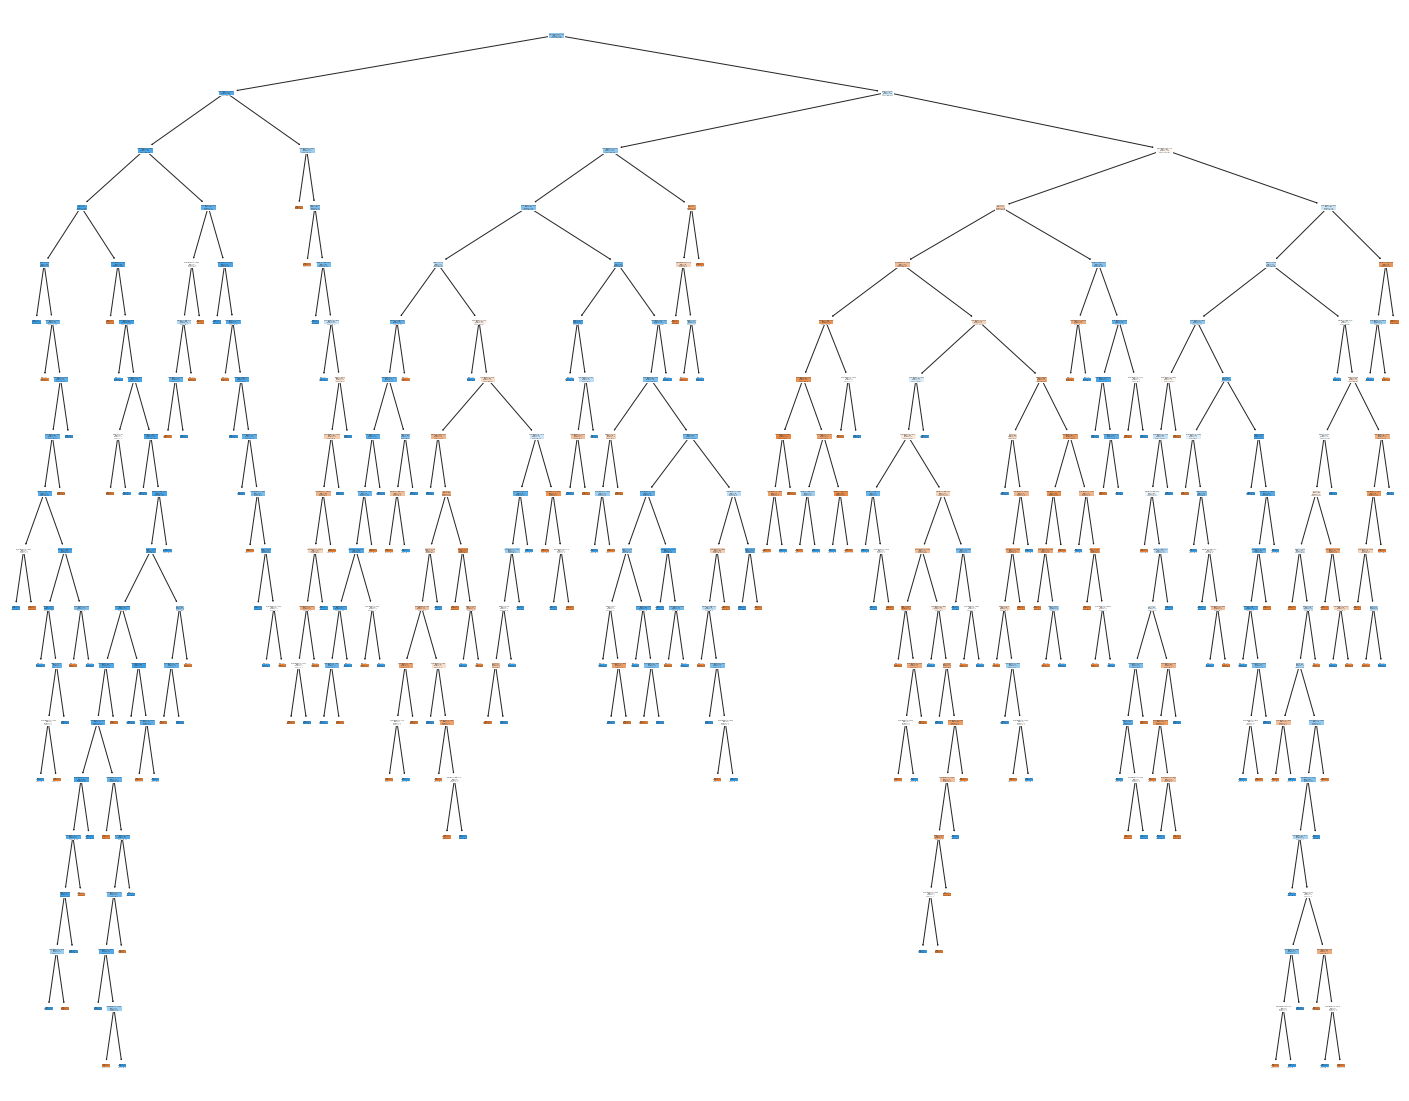

In [58]:
plot_decision_tree(model, feature_names)

##### This Decision Tree is far too deep.  It needs tuned

##### Use GridSearchCV to assess optimal hyperparameters

In [59]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

In [60]:
model = DecisionTreeClassifier(random_state=rs)

In [61]:
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [62]:
best_params

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

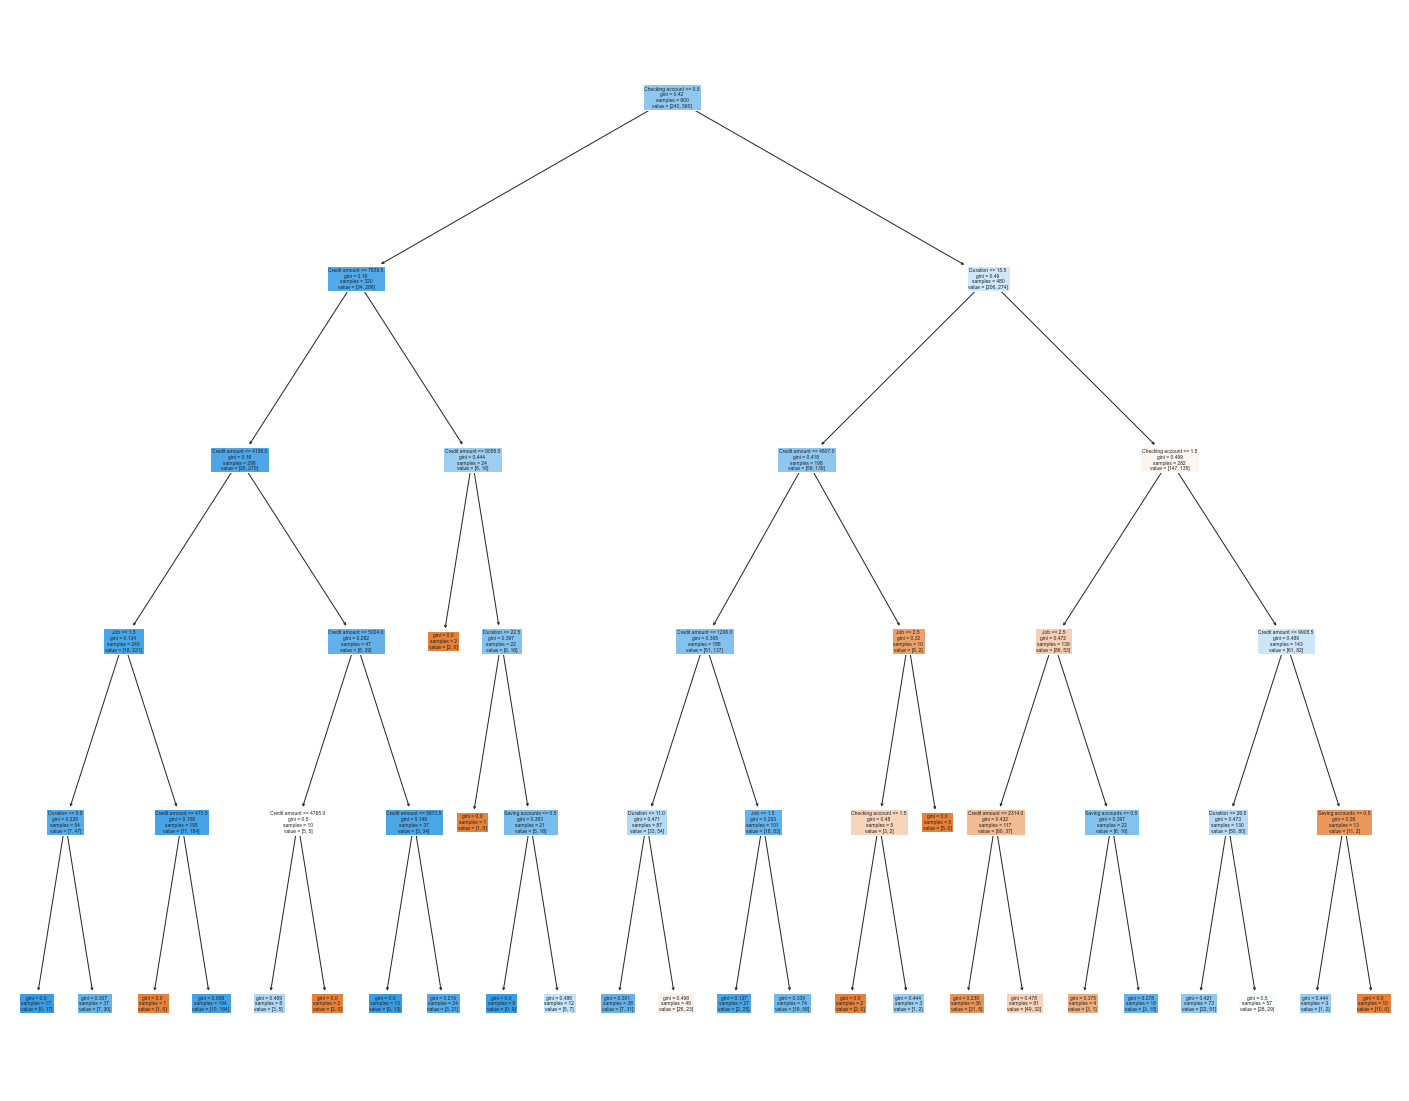

In [63]:
# Train a customized decision tree
custom_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, random_state=rs)
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)
# Plot the decision tree
plot_decision_tree(custom_model, feature_names)